In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

def get_pokemon(endpoint, pokedex_num):
    """Connects to the Pokemon API and outputs information on specific pokemon depending on the endpoint."""
    url = f"https://pokeapi.co/api/v2/{endpoint}/{pokedex_num}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(response.text)

def romanToInt(s):
    """Function borrowed from https://www.tutorialspoint.com/roman-to-integer-in-python"""
    roman = {'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000,'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900}
    i = 0
    num = 0
    while i < len(s):
        if i+1<len(s) and s[i:i+2] in roman:
            num+=roman[s[i:i+2]]
            i+=2
        else:
            #print(i)
            num+=roman[s[i]]
            i+=1
    return num

pokedex = []

for i in range(1,1009): # since there are a total of 1008 pokemon
    pokemon = get_pokemon('pokemon', i)
    species = get_pokemon('pokemon-species', i)
    
    if pokemon and species:
        generation = romanToInt(species["generation"]["name"].split("-")[1].upper())
        if species["is_legendary"] or species["is_mythical"]:
            is_special = True
        else:
            is_special = False
            
        pokedex.append({
            "pokedex_number": pokemon["id"],
            "name": pokemon["name"],
            "types": [type["type"]["name"] for type in pokemon["types"]],
            "generation": generation,
            "is_legendary/mythical": is_special,
        })
        
df = pd.DataFrame(pokedex)
df

,pokedex_number,name,types,generation,is_legendary/mythical
0,1,bulbasaur,"[grass, poison]",1,False
1,2,ivysaur,"[grass, poison]",1,False
2,3,venusaur,"[grass, poison]",1,False
3,4,charmander,[fire],1,False
4,5,charmeleon,[fire],1,False
...,...,...,...,...,...
1003,1004,chi-yu,"[dark, fire]",9,False
1004,1005,roaring-moon,"[dragon, dark]",9,False
1005,1006,iron-valiant,"[fairy, fighting]",9,False
1006,1007,koraidon,"[fighting, dragon]",9,False


In [4]:
gen9_legendary = ['zarude', 'wo-chien', 'chien-pao', 'ting-lu', 'chi-yu', 'koraidon', 'miraidon']

for name in gen9_legendary:
    df.loc[df['name'] == name, 'is_legendary/mythical'] = True
df

,pokedex_number,name,types,generation,is_legendary/mythical
0,1,bulbasaur,"[grass, poison]",1,False
1,2,ivysaur,"[grass, poison]",1,False
2,3,venusaur,"[grass, poison]",1,False
3,4,charmander,[fire],1,False
4,5,charmeleon,[fire],1,False
...,...,...,...,...,...
1003,1004,chi-yu,"[dark, fire]",9,True
1004,1005,roaring-moon,"[dragon, dark]",9,False
1005,1006,iron-valiant,"[fairy, fighting]",9,False
1006,1007,koraidon,"[fighting, dragon]",9,True


In [5]:
def types_counter(df):
    """Creates a dictionary for the counts of all types in a given dataframe"""
    types_dict = {}
    
    for index, row in df.iterrows():
        for t in row["types"]:
            if t in types_dict:
                types_dict[t] += 1
            else:
                types_dict[t] = 1
    return dict(sorted(types_dict.items(), key=lambda item: item[1], reverse=True))

types_by_gen = {}
for i in range(1, 10): # Creates a dictionary with counts for all generations
    generation_df = df[df["generation"] == i]
    types_by_gen[i] = types_counter(generation_df)
types_by_gen

{1: {'poison': 33,
  'water': 32,
  'normal': 22,
  'flying': 19,
  'grass': 14,
  'ground': 14,
  'psychic': 14,
  'fire': 12,
  'bug': 12,
  'rock': 11,
  'electric': 9,
  'fighting': 8,
  'fairy': 5,
  'ice': 5,
  'ghost': 3,
  'dragon': 3,
  'steel': 2},
 2: {'flying': 19,
  'water': 18,
  'normal': 15,
  'grass': 10,
  'fire': 10,
  'bug': 10,
  'psychic': 10,
  'ground': 10,
  'electric': 8,
  'fairy': 8,
  'rock': 7,
  'dark': 6,
  'ice': 5,
  'poison': 4,
  'steel': 4,
  'fighting': 3,
  'ghost': 1,
  'dragon': 1},
 3: {'water': 28,
  'psychic': 20,
  'normal': 18,
  'grass': 17,
  'bug': 14,
  'ground': 13,
  'flying': 12,
  'rock': 12,
  'dark': 10,
  'steel': 9,
  'dragon': 9,
  'fighting': 7,
  'fire': 6,
  'ghost': 6,
  'ice': 6,
  'poison': 5,
  'fairy': 5,
  'electric': 4},
 4: {'normal': 17,
  'grass': 14,
  'water': 14,
  'flying': 14,
  'ground': 10,
  'steel': 10,
  'bug': 9,
  'psychic': 9,
  'poison': 8,
  'ghost': 8,
  'fighting': 7,
  'electric': 7,
  'rock': 7,


In [6]:
types_for_allgens = types_counter(df)
types_for_allgens

{'water': 153,
 'normal': 130,
 'grass': 121,
 'flying': 109,
 'psychic': 98,
 'bug': 92,
 'fire': 80,
 'poison': 79,
 'ground': 75,
 'rock': 73,
 'fighting': 72,
 'dark': 69,
 'electric': 68,
 'dragon': 64,
 'fairy': 63,
 'steel': 63,
 'ghost': 62,
 'ice': 48}

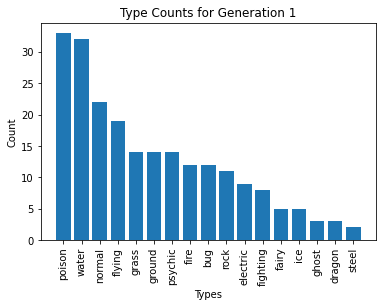

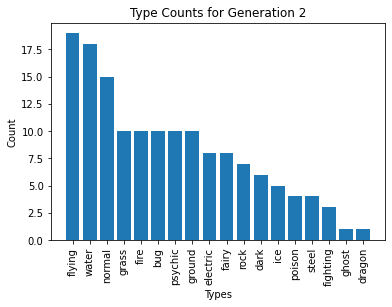

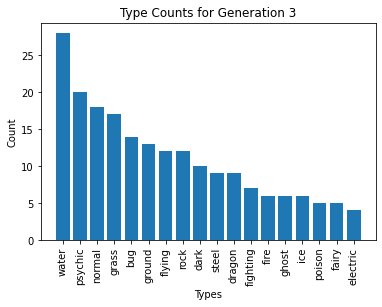

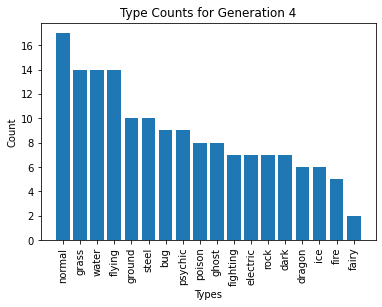

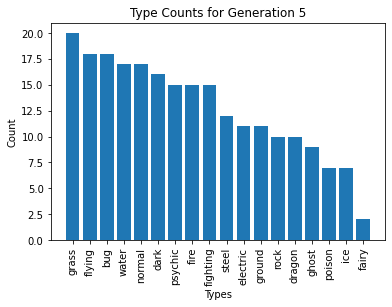

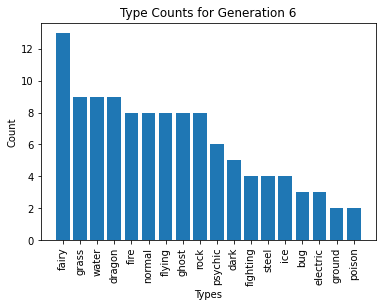

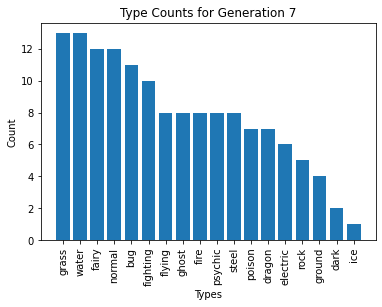

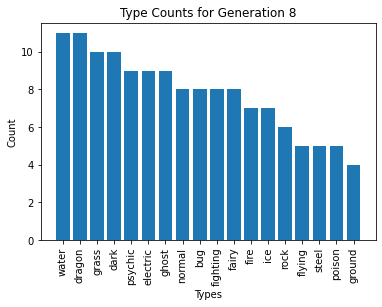

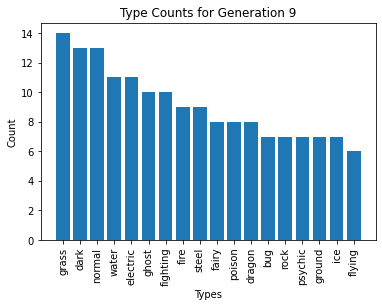

In [7]:
def generate_bar_plot(df, chart_purpose):
    types = {}
    for index, row in df.iterrows():
        for type in row["types"]:
            if type not in types:
                types[type] = 1
            else:
                types[type] += 1
    types = dict(sorted(types.items(), key=lambda item: item[1], reverse=True))
    
    fig, ax = plt.subplots()
    ax.bar(types.keys(), types.values())
    ax.set_xlabel("Types")
    ax.set_ylabel("Count")
    ax.set_title("Type Counts for " + str(chart_purpose))
    plt.xticks(rotation=90)
    plt.show()

for i in range(1, 10):
    gen_df = df[df["generation"] == i]
    generate_bar_plot(gen_df, f'Generation {i}')


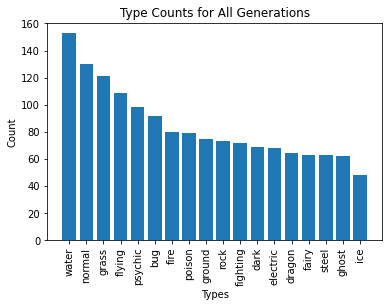

In [8]:
bp_for_all_gens = generate_bar_plot(df, 'All Generations')

In [9]:
legendary_df = df[df["is_legendary/mythical"] == True]
types_counter(legendary_df)
legendary_df

,pokedex_number,name,types,generation,is_legendary/mythical
143,144,articuno,"[ice, flying]",1,True
144,145,zapdos,"[electric, flying]",1,True
145,146,moltres,"[fire, flying]",1,True
149,150,mewtwo,[psychic],1,True
150,151,mew,[psychic],1,True
...,...,...,...,...,...
1001,1002,chien-pao,"[dark, ice]",9,True
1002,1003,ting-lu,"[dark, ground]",9,True
1003,1004,chi-yu,"[dark, fire]",9,True
1006,1007,koraidon,"[fighting, dragon]",9,True


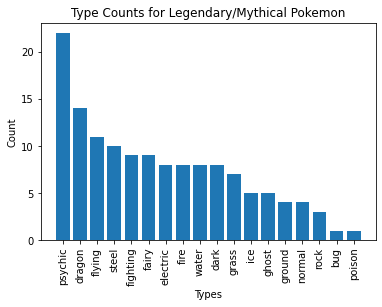

In [10]:
legendary_bp = generate_bar_plot(legendary_df, 'Legendary/Mythical Pokemon')
legendary_bp